In [1]:
import pandas as pd
from pandas import DataFrame
import pickle
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import ScalarFormatter
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_pickle('.././data/pickle/pypf_prep.pkl') # load data

In [52]:
df = df[df['Agegroup'] != 'ALL AGES'] # lets throw away all ages rows 

agemidpoint = {'ALL AGES': 100, 'UNDER 25': 20, '25-34':30, '35-44':40, 
               '45-54':50, '55-64':60, '65-74':70, '75-84':80, '85+':90}

df['Agemidpoint'] = df.Agegroup.map(lambda x: agemidpoint.get(x)) # lets give everyone an age mid point
df['YearOfDeath'] = df.Year.map(lambda x: x.year)
df['dob'] = df['YearOfDeath'] - df['Agemidpoint'] # dob is appoximately year of death - age midpoint
df['birthcohort'] = pd.cut(df.dob, range(1880,2010,10), 
                           labels=['1880-1889', '1890-1899', '1900-1909', '1910-1919', 
                                   '1920-1929','1930-1939','1940-1949','1950-1959',
                                   '1960-1969', '1970-1979', '1980-1989', '1990-1999'],
                          right=False) # add birth cohorts
df['Rate per million population'] = df['Rate per 100,000 population'] * 10


In [53]:
[i for i in range(1880,2010,10)]

[1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000]

In [59]:
mask = {}
mask['male-ipf-cohort'] = eval("(df['Sex'] == 'Male') & (df['Cause'] == 'IPF') & (df['birthcohort'] < '1980-1989')")
mask['male-meso-cohort'] = eval("(df['Sex'] == 'Male') & (df['Cause'] == 'All Mesothelioma') & (df['birthcohort'] < '1980-1989')")
mask['male-asb-cohort'] = eval("(df['Sex'] == 'Male') & (df['Cause'] == 'Asbestosis') & (df['birthcohort'] < '1980-1989')")


mask['male-ipf-cohort-ne'] = eval("(df['Sex'] == 'Male') & (df['Cause'] == 'IPF') & (df['birthcohort'] < '1980-1989') & (df['Region'] == 'NORTH EAST')")
mask['male-meso-cohort-ne'] = eval("(df['Sex'] == 'Male') & (df['Cause'] == 'All Mesothelioma') & (df['birthcohort'] < '1980-1989')& (df['Region'] == 'NORTH EAST')")


def plot_cohort_year(df, mask, title):
    cohort_data = {}

    df = df[mask]
    
    for cohort in df['birthcohort'].unique():
        grp = df[df['birthcohort'] == cohort].groupby('Year')
        cohort_data[cohort] = grp['Rate per million population'].mean()
        
    ax = pd.DataFrame(cohort_data).plot(figsize=(7,7), title=title)
    ax.set_ylabel("Rate per million")
    ax.set_xlabel("Age")
    ax.set_yscale("log", nonposy='clip')
    ax.legend(loc='upper left', frameon=False)
    # plt.ylim(ymin = 0.0)
    ax.yaxis.set_major_formatter(ScalarFormatter()) # scale as a full number not a power
    plt.grid(True)
    plt.show()
    
    
def plot_cohort_age(df, mask, title):
    cohort_data = {}

    df = df[mask]
    
    for cohort in df['birthcohort'].unique():
        grp = df[df['birthcohort'] == cohort].groupby('Agemidpoint')
        cohort_data[cohort] = grp['Rate per million population'].mean()
        
    ax = pd.DataFrame(cohort_data).plot(figsize=(7,7), title=title)
    ax.set_ylabel("Rate per million")
    ax.set_xlabel("Age")
    ax.set_yscale("log", nonposy='clip')
    ax.legend(loc='upper left', frameon=False)
    # plt.ylim(ymin = 0.0)
    ax.yaxis.set_major_formatter(ScalarFormatter()) # scale as a full number not a power
    plt.grid(True)
    plt.show()

In [60]:
# black and white mode
def black_and_white_mode():
    from cycler import cycler
    color_c = cycler('color', ['k'])
    style_c = cycler('linestyle', ['-', '--', ':', '-.'])
    markr_c = cycler('marker', ['', '.', 'o'])
    c_cms = color_c * markr_c * style_c
    c_csm = color_c * style_c * markr_c
    plt.rc('axes', prop_cycle=c_cms)

In [61]:
def setAxLinesBW(ax):
    """
    Take each Line2D in the axes, ax, and convert the line style to be 
    suitable for black and white viewing.
    """
    MARKERSIZE = 3

    COLORMAP = {
        'b': {'marker': None, 'dash': (None,None)},
        'g': {'marker': None, 'dash': [5,5]},
        'r': {'marker': None, 'dash': [5,3,1,3]},
        'c': {'marker': None, 'dash': [1,3]},
        'm': {'marker': None, 'dash': [5,2,5,2,5,10]},
        'y': {'marker': None, 'dash': [5,3,1,2,1,10]},
        'k': {'marker': 'o', 'dash': (None,None)} #[1,2,1,10]}
        }


    lines_to_adjust = ax.get_lines()
    try:
        lines_to_adjust += ax.get_legend().get_lines()
    except AttributeError:
        pass

    for line in lines_to_adjust:
        origColor = line.get_color()
        line.set_color('black')
        line.set_dashes(COLORMAP[origColor]['dash'])
        line.set_marker(COLORMAP[origColor]['marker'])
        line.set_markersize(MARKERSIZE)

In [62]:
# plot_cohort_year(df, mask['male-ipf-cohort'], 'IPF Mortality trends in England and Wales for Males \n by birth cohort')
# plot_cohort_year(df, mask['male-meso-cohort'], 'Mesothelioma Mortality trends in England and Wales for Males \n by birth cohort')

/home/drcjar/.virtualenvs/litsearch2/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


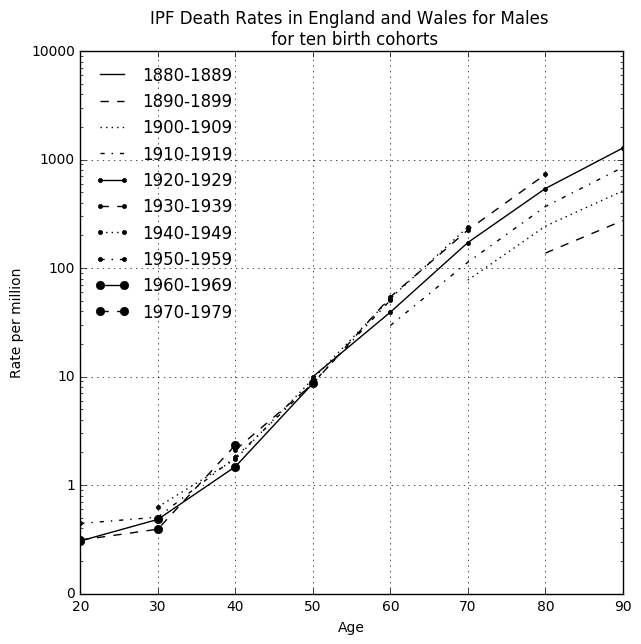

In [63]:
black_and_white_mode() # winter bts doesn't support colour
plot_cohort_age(df, mask['male-ipf-cohort'], 'IPF Death Rates in England and Wales for Males \n for ten birth cohorts')

/home/drcjar/.virtualenvs/litsearch2/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


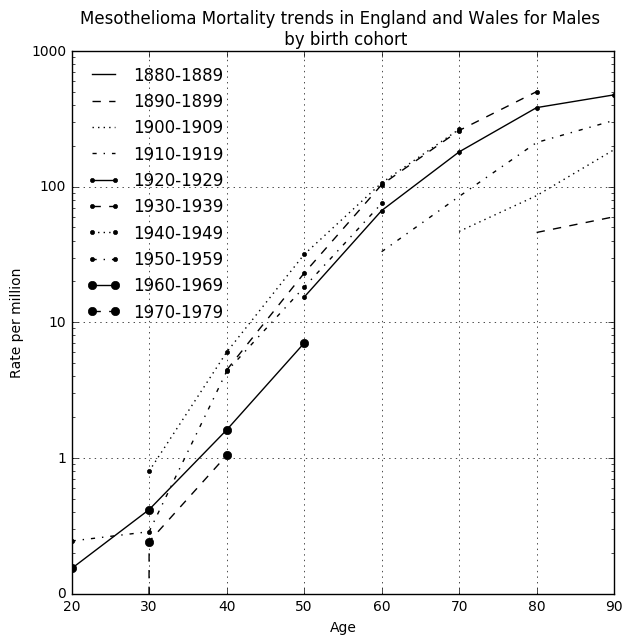

In [64]:
plot_cohort_age(df, mask['male-meso-cohort'], 'Mesothelioma Mortality trends in England and Wales for Males \n by birth cohort')

/home/drcjar/.virtualenvs/litsearch2/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


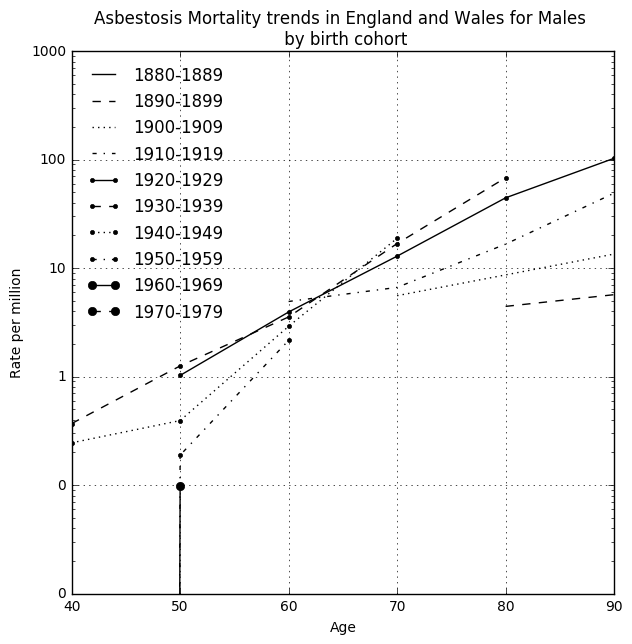

In [65]:
plot_cohort_age(df, mask['male-asb-cohort'], 'Asbestosis Mortality trends in England and Wales for Males \n by birth cohort')

In [66]:
# plot_cohort_age(df, mask['male-meso-cohort-ne'], 'Mesothelioma Mortality trends in England and Wales for Males \n by birth cohort \n for the North East')
# plot_cohort_age(df, mask['male-ipf-cohort-ne'], 'IPF Mortality trends in England and Wales for Males \n by birth cohort \n for the North East')

In [67]:
df[df['dob'] == 1900]

,Region,Agegroup,Deaths,Sex,Year,Cause,Population,2008 population,"Rate per 100,000 population",Estimated deaths age standardised to 2008 population,"Rate per 100,000 (standardised)",Agemidpoint,YearOfDeath,dob,birthcohort,Rate per million population
1170,NORTH EAST,75-84,9.000000,Male,1980-01-01,IPF,45800.0,64269.0,19.650655,12.629279,19.650655,80,1980,1900,1900-1909,196.506550
1171,NORTH EAST,75-84,1.000000,Male,1980-01-01,Asbestosis,45800.0,64269.0,2.183406,1.403253,2.183406,80,1980,1900,1900-1909,21.834061
1172,NORTH EAST,75-84,3.571429,Male,1980-01-01,All Mesothelioma,45800.0,64269.0,7.797879,5.011619,7.797879,80,1980,1900,1900-1909,77.978790
4782,NORTH EAST,85+,1.000000,Male,1990-01-01,IPF,7660.0,16284.0,13.054830,2.125849,13.054830,90,1990,1900,1900-1909,130.548303
4783,NORTH EAST,85+,1.000000,Male,1990-01-01,Asbestosis,7660.0,16284.0,13.054830,2.125849,13.054830,90,1990,1900,1900-1909,130.548303
4784,NORTH EAST,85+,3.816794,Male,1990-01-01,All Mesothelioma,7660.0,16284.0,49.827597,8.113926,49.827597,90,1990,1900,1900-1909,498.275965
1193,YORKSHIRE AND THE HUMBER,75-84,17.000000,Male,1980-01-01,IPF,77700.0,121334.0,21.879022,26.546692,21.879022,80,1980,1900,1900-1909,218.790219
1194,YORKSHIRE AND THE HUMBER,75-84,0.000000,Male,1980-01-01,Asbestosis,77700.0,121334.0,0.000000,0.000000,0.000000,80,1980,1900,1900-1909,0.000000
1195,YORKSHIRE AND THE HUMBER,75-84,3.571429,Male,1980-01-01,All Mesothelioma,77700.0,121334.0,4.596433,5.577036,4.596433,80,1980,1900,1900-1909,45.964332
4828,YORKSHIRE AND THE HUMBER,85+,8.000000,Male,1990-01-01,IPF,16683.0,34256.0,47.953006,16.426782,47.953006,90,1990,1900,1900-1909,479.530061
